In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from google.colab import drive
drive.mount('/content/gdrive')
mpl.style.use('bmh')


Mounted at /content/gdrive


# **READ FILE CREDIT RECORD**


In [5]:
# **Read File Credit_Record**
pd_credit_record = pd.read_csv("/content/gdrive/MyDrive/Desafios- Curso Data Science -Comisión 29825/Desafio 2 Visualizaciones con Python/Tarjeta Credito/credit_record.csv")
pd_credit_record.head()


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


# **_SIZE CREDIT CARD_**


In [6]:
pd_credit_record.shape


(1048575, 3)

### **_NULL ON DATA CREDIT CARD_**


In [7]:
pd_credit_record.isnull().sum()


ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

# **READ APPLICATION RECORD**


In [9]:
# Read File Application
pd_application_record = pd.read_csv("/content/gdrive/MyDrive/Desafios- Curso Data Science -Comisión 29825/Desafio 2 Visualizaciones con Python/Tarjeta Credito/application_record.csv")
pd_application_record.head()


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


# **_SIZE APPLICATION RECORD_**


In [10]:
pd_application_record.shape


(438557, 18)

### **_NULL ON DATA APPLICATION RECORD_**


In [11]:
pd_application_record.isnull().sum()


ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

### **_CLEAR DATA_**


In [12]:
pd_credit_record = pd_credit_record.drop_duplicates(subset=['ID'])
pd_application_record = pd_application_record.drop_duplicates(subset=['ID'])
print(pd_credit_record.shape)
print(pd_application_record.shape)


(45985, 3)
(438510, 18)


### MERGE RECORDS


In [13]:
merge_record = pd.merge(pd_credit_record, pd_application_record, on=["ID"])
merge_record.sort_values("ID", inplace=True)
merge_record['DAYS_BIRTH'] = merge_record['DAYS_BIRTH']/-365
merge_record['DAYS_EMPLOYED'] = merge_record['DAYS_EMPLOYED']/-365
merge_record.head()


,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,0,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,1,1,0,0,NaN,2.0
1,5008805,0,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,1,1,0,0,NaN,2.0
2,5008806,0,C,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,Security staff,2.0
3,5008808,0,0,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,Sales staff,1.0
4,5008809,-22,X,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,Sales staff,1.0


---


# GRAPHS


## MATPLOTLIB


In [14]:
merge_record["STATUS"].unique()


array(['C', '0', 'X', '1', '3', '5', '2', '4'], dtype=object)

#### NORMALIZE STATUS COLUMN

**BY THE CONTEXT OF DATA, ONLY VALUE "C" FROM STATUS COLUMNS WILL APROVED WITH A CREDIT CARD**


In [15]:
merge_record["STATUS"] = np.where(merge_record["STATUS"] == "C", 0, 1)
merge_record = merge_record.astype({"CNT_FAM_MEMBERS": "int"})


## Graph CORRELATION MARITIAL STATUS VS APPROVED CREDIT CARD


In [16]:
status_Family_Status_Join = pd.concat([merge_record["NAME_FAMILY_STATUS"], merge_record["STATUS"]],
                                      axis=1)
countRows = status_Family_Status_Join.shape[0]
status_Family_Status_Join.index = np.arange(countRows)

mapped = status_Family_Status_Join.groupby(
    ["NAME_FAMILY_STATUS", "STATUS"]).size().reset_index(name="COUNT")
mapped.head()


,NAME_FAMILY_STATUS,STATUS,COUNT
0,Civil marriage,0,1458
1,Civil marriage,1,1487
2,Married,0,12383
3,Married,1,12665
4,Separated,0,1035


In [ ]:
#mapped.plot(x="NAME_FAMILY_STATUS", y=["STATUS", "COUNT"], kind="bar")
mappped_Pivoted = mapped.pivot(
    index="STATUS", columns="NAME_FAMILY_STATUS", values="COUNT")
mappped_Pivoted


NAME_FAMILY_STATUS,Civil marriage,Married,Separated,Single / not married,Widow
STATUS,,,,,
0,1458,12383,1035,2352,722
1,1487,12665,1068,2477,810


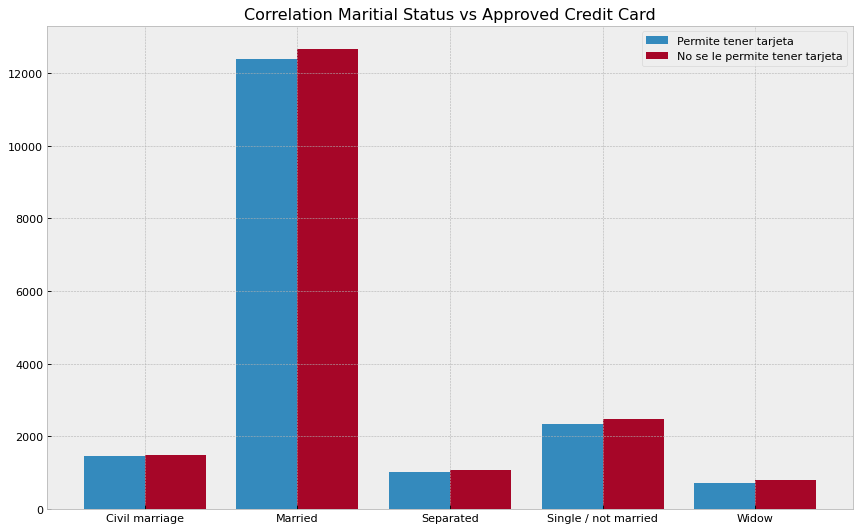

In [ ]:
status0 = []
status1 = []
columnsValues = mappped_Pivoted.columns.values
figure(figsize=(13, 8), dpi=80)
# plt_1 = plt.figure(figsize=(3, 6))

for valueSts in columnsValues:
    status0.append(mappped_Pivoted[valueSts][0])
    status1.append(mappped_Pivoted[valueSts][1])

x_axis = np.arange(len(columnsValues))

# Multi bar Chart

plt.bar(x_axis - 0.2, status0, width=0.4, label='Permite tener tarjeta')
plt.bar(x_axis + 0.2, status1, width=0.4,
        label='No se le permite tener tarjeta')

plt.xticks(x_axis, columnsValues)

# Add legend
plt.legend()

# Add title
plt.title("Correlation Maritial Status vs Approved Credit Card")

# Modify Font
plt.rcParams.update({'font.size': 3})

# Display
plt.show()


**Interpretación de los resultados**

De este gráfico es posible interpretar que existe una gran afluencia de las personas que están casadas y que desean poseer una tarjeta de crédito; pero además no es posible concluir que existe alguna tendencia respecto al estado cívil de las personas que indique que se le otorgará con mayor probabilidad su tarjeta de crédito.

### GRAPH EDUCATION


In [ ]:
record_approved = merge_record["STATUS"] == 0
merge_record_approved = merge_record[record_approved]
merge_record_approved


,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,0,0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,1,1,0,0,NaN,2
1,5008805,0,0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.890411,12.443836,1,1,0,0,NaN,2
2,5008806,0,0,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,Security staff,2
5,5008810,0,0,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,Sales staff,1
6,5008811,0,0,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,Sales staff,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36449,5150479,0,0,F,N,N,0,90000.0,Working,Higher education,Married,With parents,34.010959,0.350685,1,0,0,0,NaN,2
36450,5150480,-24,0,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,29.610959,4.764384,1,0,0,0,Core staff,3
36452,5150482,-11,0,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,29.610959,4.764384,1,0,0,0,Core staff,3
36454,5150484,0,0,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,29.610959,4.764384,1,0,0,0,Core staff,3


In [ ]:
# Dataframe record_EDUCATION_TOTAL
pd_application_record_EDUCATION = merge_record.groupby(
    ["NAME_EDUCATION_TYPE"]).size().reset_index(name="COUNT")
pd_application_record_EDUCATION_percentage = pd_application_record_EDUCATION.assign(
    PERCETANGE=pd_application_record_EDUCATION[["COUNT"]] / len(merge_record)*100)
pd_application_record_EDUCATION_percentage


,NAME_EDUCATION_TYPE,COUNT,PERCETANGE
0,Academic degree,32,0.087775
1,Higher education,9864,27.056532
2,Incomplete higher,1410,3.867570
3,Lower secondary,374,1.025866
4,Secondary / secondary special,24777,67.962257


In [ ]:
# Dataframe record_EDUCATION_APPROVED
pd_application_record_EDUCATION_APPROVED = merge_record_approved.groupby(
    ["NAME_EDUCATION_TYPE"]).size().reset_index(name="COUNT")
pd_application_record_EDUCATION_APPROVED_percentage = pd_application_record_EDUCATION_APPROVED.assign(
    PERCETANGE=pd_application_record_EDUCATION_APPROVED[["COUNT"]] / len(merge_record_approved)*100)
pd_application_record_EDUCATION_APPROVED_percentage


,NAME_EDUCATION_TYPE,COUNT,PERCETANGE
0,Academic degree,23,0.128134
1,Higher education,4844,26.986072
2,Incomplete higher,732,4.077994
3,Lower secondary,203,1.130919
4,Secondary / secondary special,12148,67.676880


<function matplotlib.pyplot.show>

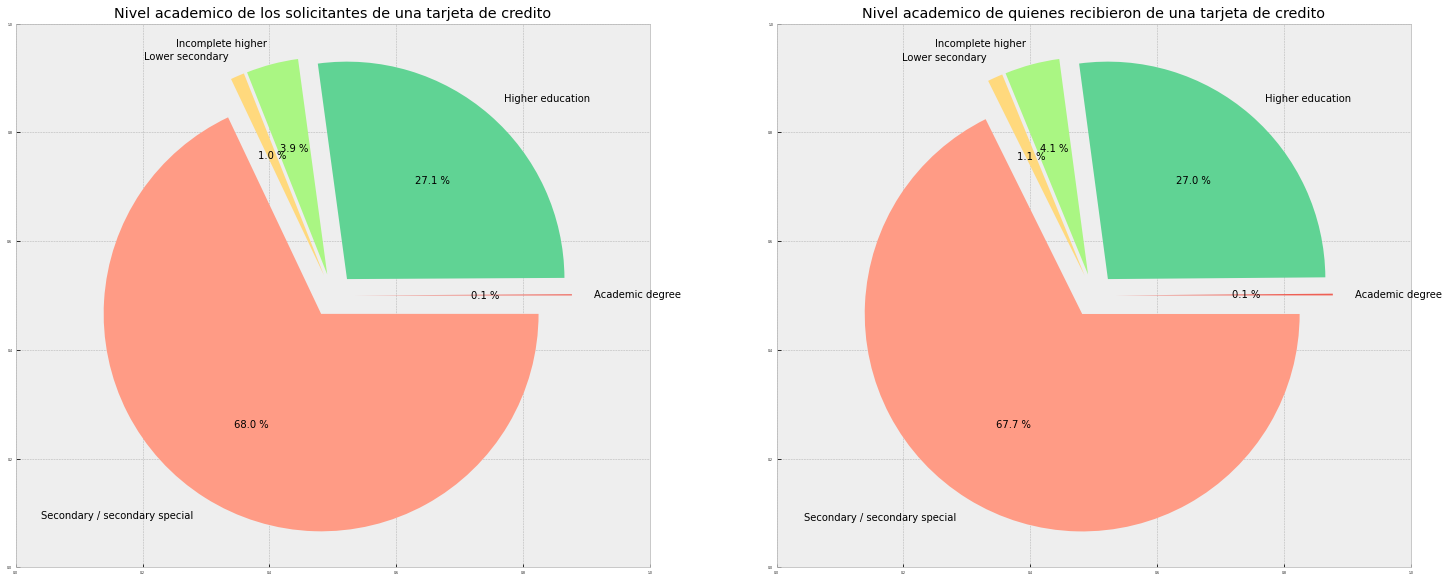

In [ ]:
# Modify Font
record_EDUCATION = pd_application_record_EDUCATION_percentage["NAME_EDUCATION_TYPE"]
record_EDUCATION_APPROVED = pd_application_record_EDUCATION_APPROVED_percentage[
    "NAME_EDUCATION_TYPE"]
percentage = pd_application_record_EDUCATION_percentage["PERCETANGE"]
percentage_APPROVED = pd_application_record_EDUCATION_APPROVED_percentage["PERCETANGE"]


# Graph record_EDUCATION
colores = ["#EE6055", "#60D394", "#AAF683", "#FFD97D", "#FF9B85"]
desfase = (0.1, 0.1, 0.1, 0.1, 0.1)
fig, ax = plt.subplots(1, 2, figsize=(25, 10))
plt.rcParams.update({'font.size': 10})
ax = fig.add_subplot(121)
ax.pie(percentage, autopct="%0.1f %%", labels=record_EDUCATION,
       colors=colores, explode=desfase)
ax.set_title('Nivel academico de los solicitantes de una tarjeta de credito')
ax = fig.add_subplot(122)
ax.pie(percentage_APPROVED, autopct="%0.1f %%",
       labels=record_EDUCATION_APPROVED, colors=colores, explode=desfase)
ax.set_title('Nivel academico de quienes recibieron de una tarjeta de credito')
plt.show


**Interpretación de los resultados**

Con respecto al total de los solicitantes y de quienes recibieron una tarjeta de credito, se observa que mas de la mitad cuentan con la secundaria completa y mas de un cuarto cuenta con educaciòn superior culminada. Con lo cual mas del 95% cuentan nivel educativo alto o medio y no se observa incidencia del nivel educativo en el otorgamiento de dicha tarjeta. Dado que se mantiene las proporciones en ambas poblaciones.


### GRAPH: CURRENCY TREND


In [ ]:
status_Salary_Members_Family_Join = pd.concat([merge_record["AMT_INCOME_TOTAL"], merge_record["STATUS"], merge_record["CNT_FAM_MEMBERS"]],
                                              axis=1)
status_Salary_Members_Family_Join.head()


,AMT_INCOME_TOTAL,STATUS,CNT_FAM_MEMBERS
0,427500.0,0,2
1,427500.0,0,2
2,112500.0,0,2
3,270000.0,1,1
4,270000.0,1,1


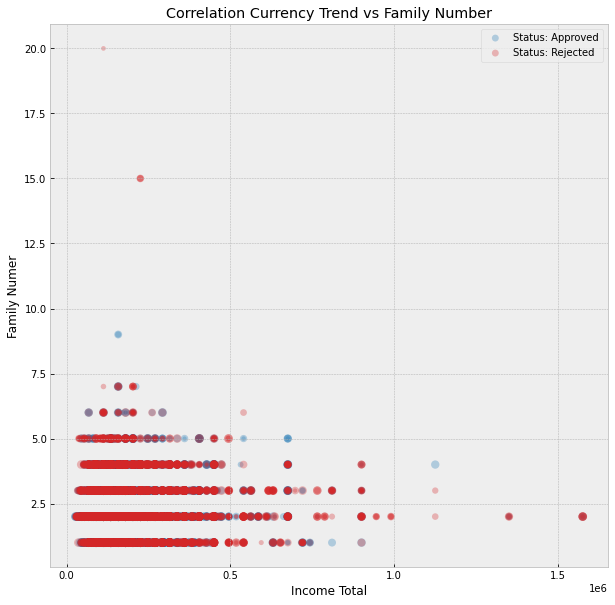

In [ ]:
#plt.style.use('_mpl-gallery')
# plot:
fig, ax = plt.subplots(figsize=(10, 10))

status_0_Salary_Members_Family_Join = status_Salary_Members_Family_Join.loc[
    status_Salary_Members_Family_Join['STATUS'] == 0]
status_1_Salary_Members_Family_Join = status_Salary_Members_Family_Join.loc[
    status_Salary_Members_Family_Join['STATUS'] == 1]

y0 = status_0_Salary_Members_Family_Join["CNT_FAM_MEMBERS"].values
x0 = status_0_Salary_Members_Family_Join["AMT_INCOME_TOTAL"].values

sizes = np.random.uniform(15, 80, len(x0))
ax.scatter(x0, y0, c='tab:blue', s=sizes, label='Status: Approved',
           alpha=0.3, edgecolors='none')


y1 = status_1_Salary_Members_Family_Join["CNT_FAM_MEMBERS"].values
x1 = status_1_Salary_Members_Family_Join["AMT_INCOME_TOTAL"].values

sizes = np.random.uniform(15, 80, len(x1))
ax.scatter(x1, y1, c='tab:red', s=sizes, label='Status: Rejected',
           alpha=0.3, edgecolors='none')

ax.legend()
ax.grid(True)
# Add labels
plt.title("Correlation Currency Trend vs Family Number")
plt.xlabel("Income Total")
plt.ylabel("Family Numer")
# Modify Font
plt.rcParams.update({'font.size': 30})
plt.show()


**Interpretación de los resultados**

Respecto a la gráfica presentada, es posible concluir que la mayor cantidad de personas que solicitan una tarjeta de crédito tienen un salario anual máximo hasta los 500.000 USD. Además tampoco existe una relación directa entre los miembros familiares vs al salario. Solo se aprecia que dentro del rango especificado predomina el rechazo a la solicitud de tarjeta de crédito.


---


## SEABORN


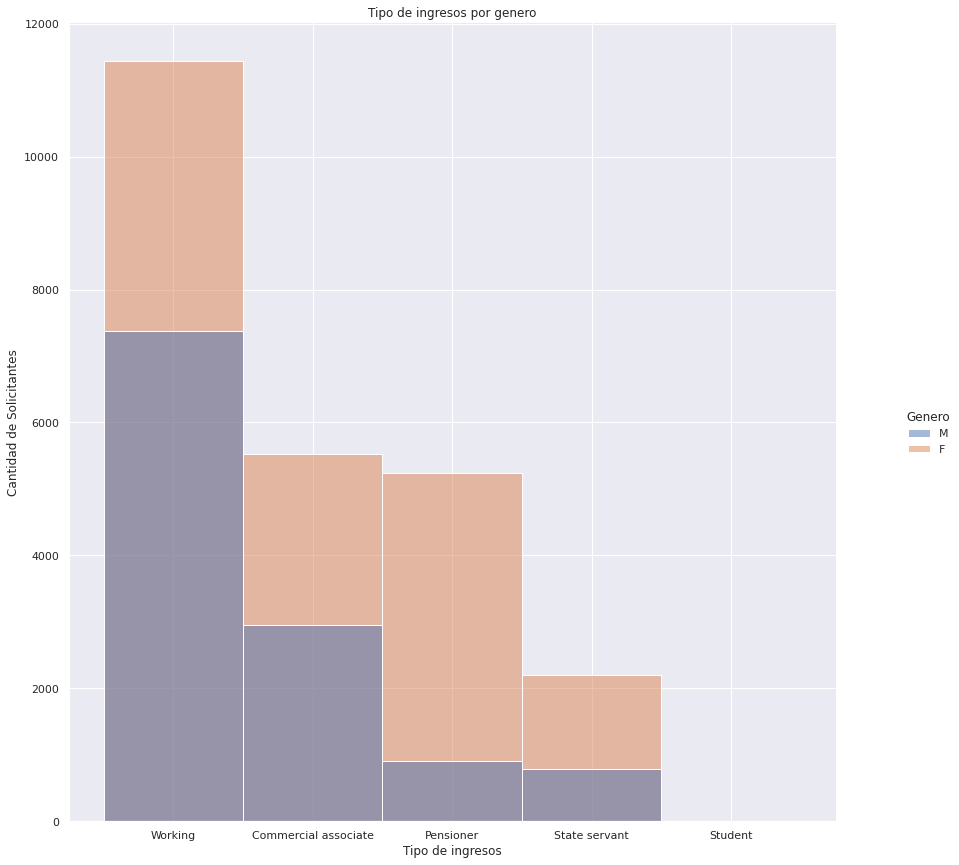

In [ ]:
# Graph INCOME_TYPE
sns.set(font_scale=1)
ax = sns.displot(data=merge_record, x="NAME_INCOME_TYPE",
                 hue="CODE_GENDER", height=12)
ax.set(xlabel='Tipo de ingresos', ylabel='Cantidad de Solicitantes',
       title="Tipo de ingresos por genero")
ax.legend.set_title("Genero")


**Interpretación de los resultados**

Con respecto al total de los solicitantes, se observa que la mayoría tiene sus ingresos empleos privados en condición de dependencia, teniendo una mayor incidencia en este grupo los hombres. EL segundo grupo corresponde a ingresos provenientes de negocios o inversiones, al igual que el caso anterior los hombres tiene mayor parcicipación. Finalmente, estan los pensionados y empleados publicos donde las mujeres tienen mayor incidencia. 

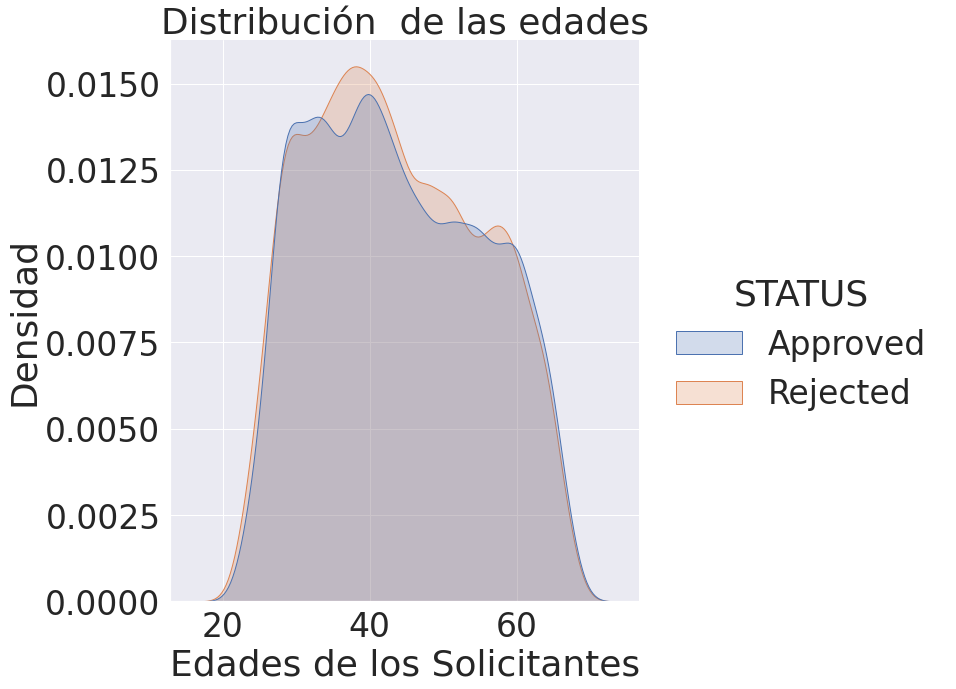

In [ ]:
# Graph Age DISTIBUTION
merge_record_change_value_status = merge_record.copy()
merge_record_change_value_status["STATUS"] = np.where(
    merge_record_change_value_status["STATUS"] == 0, "Approved", "Rejected")
ax = sns.displot(data=merge_record_change_value_status,
                 x='DAYS_BIRTH', kind='kde', hue='STATUS', fill=True, height=10)
ax.set(xlabel='Edades de los Solicitantes',
       ylabel='Densidad', title='Distribución  de las edades')


**Interpretación de los resultados**

Se observa que la mayoria de solicitantes y aprobados tiene edadaes entre 35 y 45 años. Tambien es claro que ambas distribuciones tiene un comportamiento similar con lo cual se concluye que la edad no es factor que tuvo impacto en las aprobaciones. Finalmente, otro dato de relevancia es que la mayor parte de solicitantes y aprobados tiene edades por debajo de 50 años.


### GRAPH HOUSING TYPE, OWN CAR AND STATUS


In [ ]:
ownCar_HousingType_merge = pd.concat([merge_record["FLAG_OWN_CAR"], merge_record["NAME_HOUSING_TYPE"],  merge_record["STATUS"]],
                                     axis=1)
ownCar_HousingType_merge["STATUS"] = np.where(
    ownCar_HousingType_merge["STATUS"] == 0, "Approved", "Rejected")
mapped = ownCar_HousingType_merge.groupby(
    ["FLAG_OWN_CAR", "NAME_HOUSING_TYPE", "STATUS"]).size().reset_index(name="COUNT")

mapped


,FLAG_OWN_CAR,NAME_HOUSING_TYPE,STATUS,COUNT
0,N,Co-op apartment,Approved,24
1,N,Co-op apartment,Rejected,49
2,N,House / apartment,Approved,9998
3,N,House / apartment,Rejected,10264
4,N,Municipal apartment,Approved,380
5,N,Municipal apartment,Rejected,385
6,N,Office apartment,Approved,61
7,N,Office apartment,Rejected,76
8,N,Rented apartment,Approved,178
9,N,Rented apartment,Rejected,174


Text(0.5, 0.98, 'Housing Type vs Count, Mapped to Status')

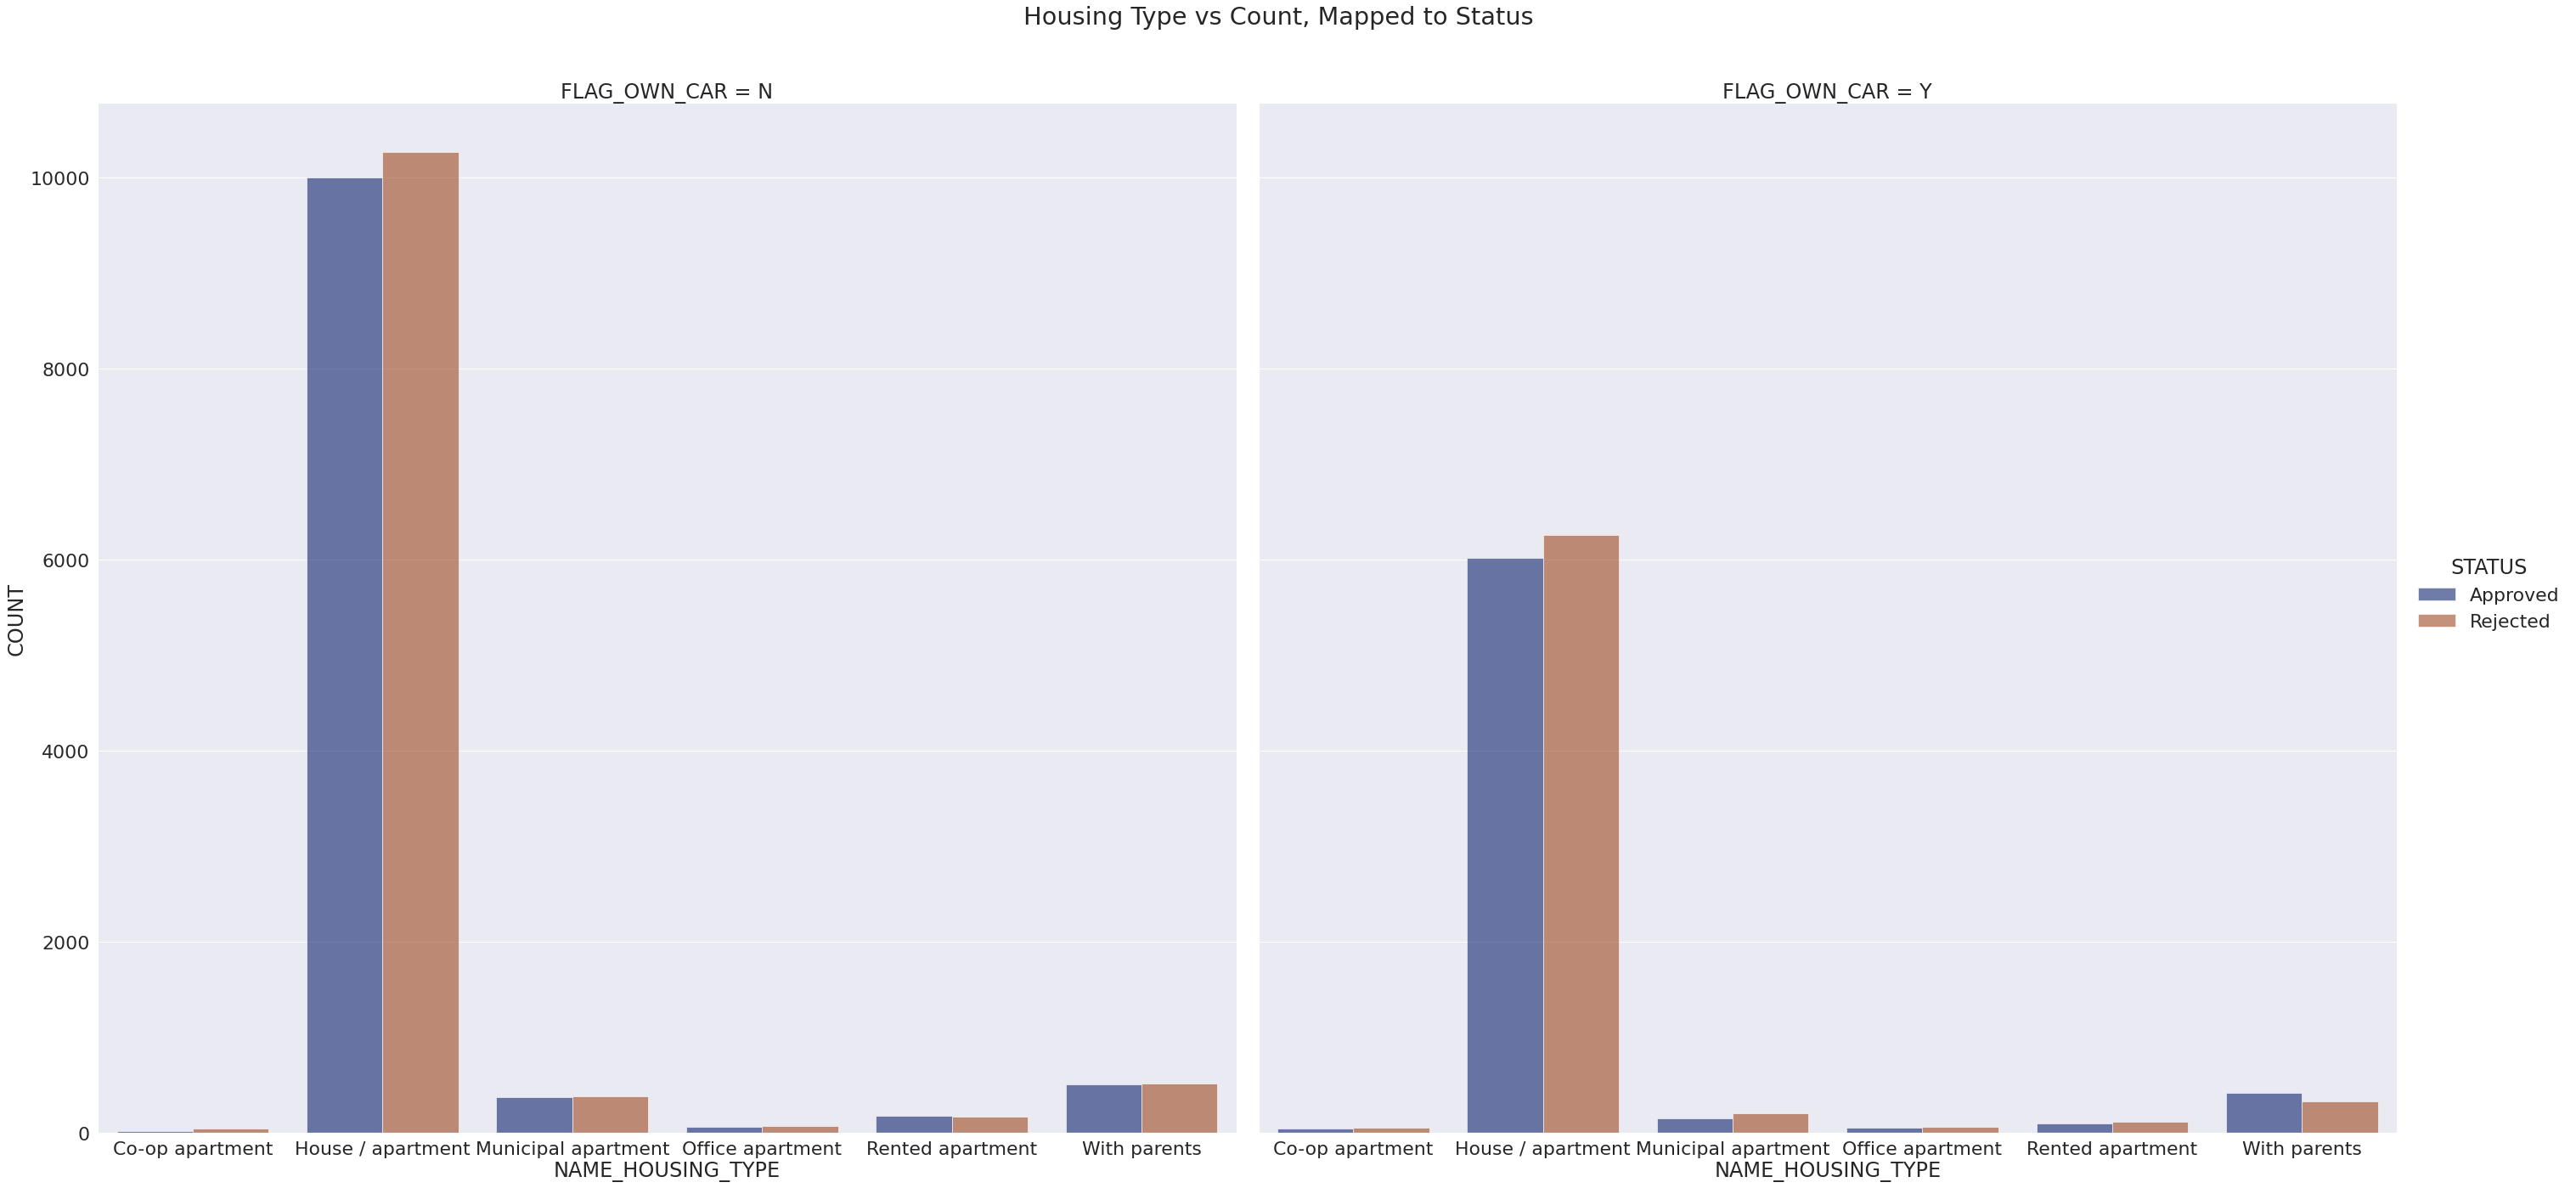

In [ ]:
sns.set(font_scale=2)
cp = sns.catplot(
    data=mapped, kind="bar",
    x="NAME_HOUSING_TYPE", y="COUNT", hue="STATUS", col="FLAG_OWN_CAR",
    ci="sd", palette="dark", alpha=.6, height=20
)
cp.fig.subplots_adjust(top=0.9)  # adjust the Figure in cp
cp.fig.suptitle('Housing Type vs Count, Mapped to Status')


**Interpretación de los resultados**

Para el análisis de la gráfica en donde se presentan dos escenarios: las personas que poseen o no un vehículo, y a la vez comparando si situación respecto al tipo de casa en que vive. La predominancia en ambas gráfica es para personas que poseen una casa o departamento. Además concluir que no existe una tendencia respecto a qué personas se le asigna una tarjeta o quienes no.